# Train additional models using fast.ai

Try out some different ideas for improving the results.

## Setup

### Import necessary libraries

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import * #used for fastai
from IPython import display #used to display media in notebook
import soundfile as sf #used to load sound files
import matplotlib.pyplot as plt #used to plot in notebook
import scipy
from scipy.signal import hann
from scipy.fftpack import rfft

import pandas as pd
from fastai.data.all import *
from fastai.vision.all import *
import librosa
import os
import torch;
import torchaudio;

### Check if CUDA is available - This will be a problem later if this doesn't work

In [3]:
print(torch.cuda.is_available())

True


### Setup dataset paths

In [4]:
DATA_ROOT_DIR=os.path.normpath(os.path.join(os.getcwd(), 'full_data'))
SAMPLE_DATA_ROOT_DIR=os.path.normpath(os.path.join(os.getcwd(), 'sample_data'))

DATA_WHALE_AUDIO_DIR=os.path.join(DATA_ROOT_DIR, 'whale')
DATA_NOT_WHALE_AUDIO_DIR=os.path.join(DATA_ROOT_DIR, 'not_whale')
path = Path(DATA_ROOT_DIR)

### Create Fast.AI Transformer to Load Audio to Spectrogram

In [6]:
def to_specgram(audio_file, n_fft=256):
    waveform, sample_rate = torchaudio.load(audio_file)
    transform = torchaudio.transforms.Spectrogram(n_fft=n_fft)
    spectrogram = transform(waveform)
    return spectrogram[0]

class SpecgramTransform(Transform):
    def __init__(self): self.aug = to_specgram
    def encodes(self, audio_file: Path):
        aug_img = self.aug(audio_file)
        return aug_img

Check one file to see if data loaded correctly

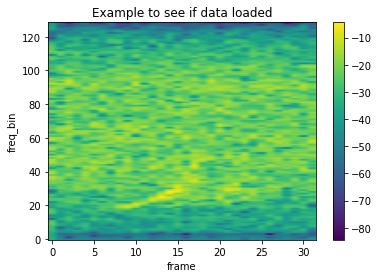

In [7]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

files = get_files(path)
file = files[0]
s = to_specgram(file)
plot_spectrogram(s, title='Example to see if data loaded')

## Model Training

### Variation 1: _Describe the idea_

TODO: Write a brief description of what you are going to try differently.

In [ ]:
# load and transform data
dblock = DataBlock(
    blocks    = (TransformBlock, CategoryBlock),
    get_items = get_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = [ SpecgramTransform() ]
)
dls = dblock.dataloaders(path)

# train the model

### Variation 2: ...

## Results

Write up a summary of the results you achieved. Why do you suspect that certain things worked well? Why do you suspect other things didn't work so well? What did you learn? What surprised you? What, if any, would be additional next steps? What new questions do you have?